<a href="https://colab.research.google.com/github/RTae/AI102/blob/master/week1/AI102_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Neartest Neighbor : Classification**

**From Scratch**

In [0]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files 
import io


In [0]:
# write Fuction

def minmax4norm(Data):
  _min = Data.min(axis = 0,keepdims = True)
  _max = Data.max(axis = 0,keepdims = True)

  return _min,_max

def minmaxNorm(Data,_min,_max):
  x_norm = (Data - _min)/(_max - _min)

  return x_norm

def KNN_Dis(X_Train,X_Vaild):
  all_dis = []

  for X_V in X_Vaild:
    dis = ((X_Train - X_V)**2).sum(axis = 1)
    dis = np.sqrt(dis)
    all_dis.append(dis)
  return (np.array(all_dis))

def KNN_Sort(Y_Train,all_dis):
  all_sorted_traget = []
  for dis in all_dis:
    sorted_target = Y_Train[dis.argsort()]
    all_sorted_traget.append(sorted_target)
  return np.array(all_sorted_traget)

def KNN_FindClass(all_sorted_traget,K):
  all_class = []
  for sorted_target in all_sorted_traget:
    unique, count_unique = np.unique(sorted_target[:K, :],return_counts=True)
    _class = unique[count_unique.argmax()]
    all_class.append(_class)
  return np.array(all_class).reshape(-1,1)

def KNN_findError_all(Y_Vaild,all_sorted_traget,min_K,max_K):
  error_list = []
  K_list = [i for i in range(min_K,max_K+1)]
  for K in K_list:
    Yhat = KNN_FindClass(all_sorted_traget,K)
    K_error = find_error_classification_onces(Y_Vaild,Yhat)
    error_list.append(K_error)
  return error_list,K_list

def find_error_classification_onces(Y, Yhat):
    N = Y.shape[0]
    error = (100/N)*(Y != Yhat).sum()
    return error

def KNN_best_K(K_list,error_list):
  K_list = np.array(K_list)
  error_list = np.array(error_list)
  plt.plot(K_list,error_list)
  plt.xlabel('K'),
  plt.ylabel('Error')

  sorted_K = K_list[error_list.argsort()]
  error_list.sort()
  best_K = sorted_K[0]
  print(best_K)
  print()
  for i in range(len(K_list)):
    print('K : ',sorted_K[i],', error : ',error_list[i])
  return best_K

def KNNC_FIT(X_train,Y_train,X_Vaild,Y_Vaild,min_K,max_K):
  min_Train,max_Train = minmax4norm(X_Train)
  X_norm_Train = minmaxNorm(X_Train,min_Train,max_Train)
  X_norm_Vaild = minmaxNorm(X_Vaild,min_Train,max_Train)
  dis = KNN_Dis(X_norm_Train,X_norm_Vaild)
  Sorted_Target = KNN_Sort(Y_Train,dis)
  error,K_list = KNN_findError_all(Y_Vaild,Sorted_Target,min_K,max_K)
  best_K = KNN_best_K(K_list, error)

  return best_K

def KNNC_Predict(X_Train,Y_Train,X_Test,bestK):
  min_Train,max_Train = minmax4norm(X_Train)
  X_norm_Train = minmaxNorm(X_Train,min_Train,max_Train)
  X_norm_Test = minmaxNorm(X_Test,min_Train,max_Train)
  dis = KNN_Dis(X_norm_Train,X_norm_Test)
  Sorted_Target = KNN_Sort(Y_Train,dis)
  Yhat = KNN_FindClass(Sorted_Target,bestK)

  return Yhat

Example I : SET50 Data

In [1]:
# Prepare data
from google.colab import files
uploaded = files.upload()

Saving SET50_D1_Dataset_Classification.xlsx to SET50_D1_Dataset_Classification (1).xlsx


In [0]:
data = pd.read_excel((uploaded['SET50_D1_Dataset_Classification.xlsx']),usecols = 'G:AK')

In [8]:
data

,Delta30,Delta29,Delta28,Delta27,Delta26,Delta25,Delta24,Delta23,Delta22,Delta21,Delta20,Delta19,Delta18,Delta17,Delta16,Delta15,Delta14,Delta13,Delta12,Delta11,Delta10,Delta9,Delta8,Delta7,Delta6,Delta5,Delta4,Delta3,Delta2,Delta1,Target
0,12.00,-2.00,-15.97,-0.88,-8.15,-8.13,-14.22,10.36,14.63,-8.69,19.29,-0.82,-3.95,-12.61,4.80,9.69,2.88,-7.33,-16.43,-6.43,-5.53,10.00,-2.70,-11.77,7.83,2.38,-27.98,-22.08,-37.88,33.37,Down
1,-2.00,-15.97,-0.88,-8.15,-8.13,-14.22,10.36,14.63,-8.69,19.29,-0.82,-3.95,-12.61,4.80,9.69,2.88,-7.33,-16.43,-6.43,-5.53,10.00,-2.70,-11.77,7.83,2.38,-27.98,-22.08,-37.88,33.37,-12.91,Up
2,-15.97,-0.88,-8.15,-8.13,-14.22,10.36,14.63,-8.69,19.29,-0.82,-3.95,-12.61,4.80,9.69,2.88,-7.33,-16.43,-6.43,-5.53,10.00,-2.70,-11.77,7.83,2.38,-27.98,-22.08,-37.88,33.37,-12.91,-4.94,Down
3,-0.88,-8.15,-8.13,-14.22,10.36,14.63,-8.69,19.29,-0.82,-3.95,-12.61,4.80,9.69,2.88,-7.33,-16.43,-6.43,-5.53,10.00,-2.70,-11.77,7.83,2.38,-27.98,-22.08,-37.88,33.37,-12.91,-4.94,-8.36,Down
4,-8.15,-8.13,-14.22,10.36,14.63,-8.69,19.29,-0.82,-3.95,-12.61,4.80,9.69,2.88,-7.33,-16.43,-6.43,-5.53,10.00,-2.70,-11.77,7.83,2.38,-27.98,-22.08,-37.88,33.37,-12.91,-4.94,-8.36,-34.40,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,5.24,-0.33,1.03,-1.87,-3.72,13.85,17.74,9.41,-2.18,-0.48,3.75,-0.56,7.19,-1.51,8.94,-7.16,2.14,-10.69,4.20,-2.72,-8.88,14.41,-0.89,-7.12,-0.48,-3.84,1.61,7.53,-7.23,-1.11,Down
1913,-0.33,1.03,-1.87,-3.72,13.85,17.74,9.41,-2.18,-0.48,3.75,-0.56,7.19,-1.51,8.94,-7.16,2.14,-10.69,4.20,-2.72,-8.88,14.41,-0.89,-7.12,-0.48,-3.84,1.61,7.53,-7.23,-1.11,-1.25,Up
1914,1.03,-1.87,-3.72,13.85,17.74,9.41,-2.18,-0.48,3.75,-0.56,7.19,-1.51,8.94,-7.16,2.14,-10.69,4.20,-2.72,-8.88,14.41,-0.89,-7.12,-0.48,-3.84,1.61,7.53,-7.23,-1.11,-1.25,3.14,Down
1915,-1.87,-3.72,13.85,17.74,9.41,-2.18,-0.48,3.75,-0.56,7.19,-1.51,8.94,-7.16,2.14,-10.69,4.20,-2.72,-8.88,14.41,-0.89,-7.12,-0.48,-3.84,1.61,7.53,-7.23,-1.11,-1.25,3.14,-10.04,Down


In [0]:
DataMatrix = data.values

In [10]:
DataMatrix.shape

(1917, 31)

In [0]:
D = DataMatrix.shape[-1]-1
X = DataMatrix[:, :D]
X = np.array(X, dtype=np.float32)
Y = DataMatrix[:, D:]

X_Train = X[:-300,:]
Y_Train = Y[:-300,:]
X_Vaild = X[-300:-150,:]
Y_Vaild = Y[-300:-150,:]
X_Test = X[-150:,:]
Y_Test = Y[-150:,:]


10

K :  10 , error :  42.666666666666664
K :  9 , error :  42.666666666666664
K :  3 , error :  43.33333333333333
K :  6 , error :  44.0
K :  7 , error :  44.0
K :  5 , error :  44.666666666666664
K :  16 , error :  44.666666666666664
K :  2 , error :  45.33333333333333
K :  12 , error :  46.666666666666664
K :  26 , error :  46.666666666666664
K :  28 , error :  47.33333333333333
K :  8 , error :  47.33333333333333
K :  22 , error :  47.33333333333333
K :  18 , error :  48.0
K :  19 , error :  48.666666666666664
K :  11 , error :  48.666666666666664
K :  20 , error :  49.33333333333333
K :  27 , error :  49.33333333333333
K :  15 , error :  49.33333333333333
K :  30 , error :  49.33333333333333
K :  29 , error :  49.33333333333333
K :  24 , error :  50.0
K :  14 , error :  50.0
K :  4 , error :  50.0
K :  21 , error :  50.666666666666664
K :  17 , error :  50.666666666666664
K :  23 , error :  52.0
K :  13 , error :  52.0
K :  25 , error :  52.666666666666664
K :  1 , error :  52.666

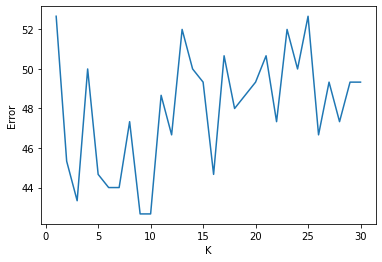

In [12]:
#Learning

best_K = KNNC_FIT(X_Train,Y_Train,X_Vaild,Y_Vaild,1,30)

In [13]:
#Predicts

Yhat = KNNC_Predict(X_Train,Y_Train,X_Test,best_K)
error = find_error_classification_onces(Y_Test,Yhat)
print('Error : ' + str(error) + ' %')

Error : 45.33333333333333 %


Example II : EURUSD Data

In [16]:
# Prepare data

uploaded = files.upload()

Saving EURUSD_D1_Dataset_Classification.xlsx to EURUSD_D1_Dataset_Classification (1).xlsx


In [0]:
data = pd.read_excel((uploaded['EURUSD_D1_Dataset_Classification.xlsx']),usecols = 'G:AK')

In [18]:
data

,Delta30,Delta29,Delta28,Delta27,Delta26,Delta25,Delta24,Delta23,Delta22,Delta21,Delta20,Delta19,Delta18,Delta17,Delta16,Delta15,Delta14,Delta13,Delta12,Delta11,Delta10,Delta9,Delta8,Delta7,Delta6,Delta5,Delta4,Delta3,Delta2,Delta1,Target
0,0.00930,-0.02400,0.02300,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,-0.01480,0.00240,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,Down
1,-0.02400,0.02300,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,-0.01480,0.00240,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,Down
2,0.02300,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,-0.01480,0.00240,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,-0.00320,Down
3,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,-0.01480,0.00240,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,-0.00320,-0.01060,Up
4,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,-0.01480,0.00240,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,-0.00320,-0.01060,0.00740,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,-0.00386,-0.00105,-0.00660,0.00072,-0.00236,0.00322,0.00650,0.00774,0.00296,-0.00316,0.00017,0.00007,0.00004,-0.00845,0.00011,-0.00084,0.00065,-0.00582,-0.00118,-0.00068,0.00429,0.00042,0.00155,-0.00123,-0.00484,0.00155,0.00520,-0.00569,-0.00116,-0.00575,Down
5339,-0.00105,-0.00660,0.00072,-0.00236,0.00322,0.00650,0.00774,0.00296,-0.00316,0.00017,0.00007,0.00004,-0.00845,0.00011,-0.00084,0.00065,-0.00582,-0.00118,-0.00068,0.00429,0.00042,0.00155,-0.00123,-0.00484,0.00155,0.00520,-0.00569,-0.00116,-0.00575,-0.00118,Up
5340,-0.00660,0.00072,-0.00236,0.00322,0.00650,0.00774,0.00296,-0.00316,0.00017,0.00007,0.00004,-0.00845,0.00011,-0.00084,0.00065,-0.00582,-0.00118,-0.00068,0.00429,0.00042,0.00155,-0.00123,-0.00484,0.00155,0.00520,-0.00569,-0.00116,-0.00575,-0.00118,0.00071,Down
5341,0.00072,-0.00236,0.00322,0.00650,0.00774,0.00296,-0.00316,0.00017,0.00007,0.00004,-0.00845,0.00011,-0.00084,0.00065,-0.00582,-0.00118,-0.00068,0.00429,0.00042,0.00155,-0.00123,-0.00484,0.00155,0.00520,-0.00569,-0.00116,-0.00575,-0.00118,0.00071,-0.00194,Up


In [0]:
DataMatrix = data.values

In [20]:
DataMatrix.shape

(5343, 31)

In [0]:
D = DataMatrix.shape[-1]-1
X = DataMatrix[:, :D]
X = np.array(X, dtype=np.float32)
Y = DataMatrix[:, D:]

X_Train = X[3000:-100,:]
Y_Train = Y[3000:-100,:]
X_Vaild = X[-100:-50,:]
Y_Vaild = Y[-100:-50,:]
X_Test = X[-50:,:]
Y_Test = Y[-50:,:]

5

K :  5 , error :  40.0
K :  23 , error :  40.0
K :  1 , error :  42.0
K :  25 , error :  42.0
K :  22 , error :  42.0
K :  21 , error :  42.0
K :  2 , error :  44.0
K :  3 , error :  44.0
K :  24 , error :  44.0
K :  20 , error :  44.0
K :  19 , error :  44.0
K :  28 , error :  46.0
K :  27 , error :  46.0
K :  26 , error :  46.0
K :  18 , error :  46.0
K :  30 , error :  46.0
K :  29 , error :  46.0
K :  6 , error :  46.0
K :  4 , error :  46.0
K :  17 , error :  48.0
K :  8 , error :  48.0
K :  7 , error :  48.0
K :  16 , error :  48.0
K :  9 , error :  50.0
K :  15 , error :  50.0
K :  12 , error :  52.0
K :  11 , error :  52.0
K :  10 , error :  52.0
K :  14 , error :  54.0
K :  13 , error :  54.0


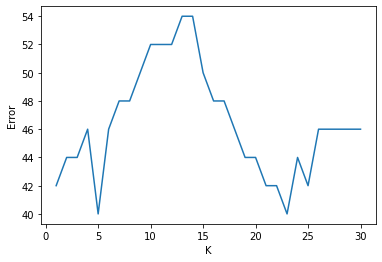

In [22]:
#Learning

best_K = KNNC_FIT(X_Train,Y_Train,X_Vaild,Y_Vaild,1,30)

In [23]:
#Predicts

Yhat = KNNC_Predict(X_Train,Y_Train,X_Test,best_K)
error = find_error_classification_onces(Y_Test,Yhat)
print('Error : ' + str(error) + ' %')

Error : 58.0 %


Example III : BMI Data

In [24]:
# Prepare data

uploaded = files.upload()

Saving BMI_Dataset_Classification.xlsx to BMI_Dataset_Classification (1).xlsx


In [0]:
data = pd.read_excel((uploaded['BMI_Dataset_Classification.xlsx']))

In [26]:
data

,Weight,Height,Target
0,66.17,185.21,normal
1,71.27,168.91,fat lv3
2,73.17,179.83,normal
3,81.74,171.76,fat lv2
4,92.97,172.89,fat lv3
...,...,...,...
995,63.24,141.45,fat lv3
996,47.55,166.64,thin
997,68.10,168.52,fat lv1
998,74.39,169.24,fat lv2


In [0]:
DataMatrix = data.values

In [28]:
DataMatrix.shape

(1000, 3)

In [0]:
D = DataMatrix.shape[-1]-1
X = DataMatrix[:, :D]
X = np.array(X, dtype=np.float32)
Y = DataMatrix[:, D:]

X_Train = X[:800,:]
Y_Train = Y[:800,:]
X_Vaild = X[800:900,:]
Y_Vaild = Y[800:900,:]
X_Test = X[900:,:]
Y_Test = Y[900:,:]

2

K :  2 , error :  5.0
K :  6 , error :  5.0
K :  7 , error :  5.0
K :  1 , error :  6.0
K :  4 , error :  6.0
K :  12 , error :  6.0
K :  3 , error :  7.0
K :  8 , error :  7.0
K :  9 , error :  7.0
K :  10 , error :  7.0
K :  11 , error :  7.0
K :  13 , error :  7.0
K :  14 , error :  7.0
K :  16 , error :  8.0
K :  15 , error :  8.0
K :  5 , error :  8.0
K :  17 , error :  9.0
K :  18 , error :  9.0
K :  19 , error :  9.0
K :  20 , error :  9.0
K :  22 , error :  9.0
K :  23 , error :  9.0
K :  26 , error :  9.0
K :  21 , error :  10.0
K :  24 , error :  10.0
K :  25 , error :  10.0
K :  30 , error :  10.0
K :  27 , error :  11.0
K :  28 , error :  11.0
K :  29 , error :  11.0


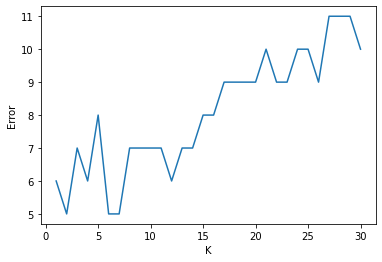

In [32]:
#Learning

best_K = KNNC_FIT(X_Train,Y_Train,X_Vaild,Y_Vaild,1,30)

In [33]:
#Predicts

Yhat = KNNC_Predict(X_Train,Y_Train,X_Test,best_K)
error = find_error_classification_onces(Y_Test,Yhat)
print('Error : ' + str(error) + ' %')

Error : 12.0 %


In [34]:
print(pd.DataFrame(Yhat,Y_Test))

                  0
(fat lv1,)  fat lv1
(normal,)    normal
(normal,)   fat lv1
(normal,)    normal
(normal,)    normal
...             ...
(fat lv3,)  fat lv2
(thin,)        thin
(fat lv1,)  fat lv1
(fat lv2,)  fat lv2
(normal,)    normal

[100 rows x 1 columns]


# **K-Neartest Neighbor : Regression**

In [0]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io


In [0]:
# write Fuction

def minmax4norm(Data):
  _min = Data.min(axis = 0,keepdims = True)
  _max = Data.max(axis = 0,keepdims = True)

  return _min,_max

def minmaxNorm(Data,_min,_max):
  x_norm = (Data - _min)/(_max - _min)

  return x_norm

def KNN_Dis(X_Train,X_Vaild):
  all_dis = []

  for X_V in X_Vaild:
    dis = ((X_Train - X_V)**2).sum(axis = 1)
    dis = np.sqrt(dis)
    all_dis.append(dis)
  return (np.array(all_dis))

def KNN_Sort(Y_Train,all_dis):
  all_sorted_traget = []
  for dis in all_dis:
    sorted_target = Y_Train[dis.argsort()]
    all_sorted_traget.append(sorted_target)
  return np.array(all_sorted_traget)

def KNN_FindClass(all_sorted_traget,K):
  all_class = []
  for sorted_target in all_sorted_traget:
    value = sorted_target[:K, :].mean()
    all_class.append(value)
  return np.array(all_class).reshape(-1,1)

def KNN_findError_all(Y_Vaild,all_sorted_traget,min_K,max_K):
  error_list = []
  K_list = [i for i in range(min_K,max_K+1)]
  for K in K_list:
    Yhat = KNN_FindClass(all_sorted_traget,K)
    K_error = find_error_MAE_onces(Y_Vaild,Yhat)
    error_list.append(K_error)
  return error_list,K_list

def find_error_MAE_onces(Y, Yhat):
    N = Y.shape[0]
    error = (np.abs(Y-Yhat)).sum()/N
    return error

def KNN_best_K(K_list,error_list):
  K_list = np.array(K_list)
  error_list = np.array(error_list)
  plt.plot(K_list,error_list)
  plt.xlabel('K'),
  plt.ylabel('Error')

  sorted_K = K_list[error_list.argsort()]
  error_list.sort()
  best_K = sorted_K[0]
  print(best_K)
  print()
  for i in range(len(K_list)):
    print('K : ',sorted_K[i],', error : ',error_list[i])
  return best_K

def KNNR_FIT(X_Train,Y_Train,X_Valid,Y_Valid,min_K,max_K):
  min_Train,max_Train = minmax4norm(X_Train)
  X_norm_Train = minmaxNorm(X_Train,min_Train,max_Train)
  X_norm_Vaild = minmaxNorm(X_Valid,min_Train,max_Train)
  dis = KNN_Dis(X_norm_Train,X_norm_Vaild)
  Sorted_Target = KNN_Sort(Y_Train,dis)
  error,K_list = KNN_findError_all(Y_Valid,Sorted_Target,min_K,max_K)
  best_K = KNN_best_K(K_list, error)

  return best_K

def KNNR_predict(X_Train,Y_Train,X_Test,bestK):
  min_Train,max_Train = minmax4norm(X_Train)
  X_norm_Train = minmaxNorm(X_Train,min_Train,max_Train)
  X_norm_Test = minmaxNorm(X_Test,min_Train,max_Train)
  dis = KNN_Dis(X_norm_Train,X_norm_Test)
  Sorted_Target = KNN_Sort(Y_Train,dis)
  Yhat = KNN_FindClass(Sorted_Target,bestK)

  return Yhat

Example I : SET50 Data

In [37]:
# Prepare data

from google.colab import files
uploaded = files.upload()

Saving SET50_D1_Dataset_Regression.xlsx to SET50_D1_Dataset_Regression.xlsx


In [0]:
data = pd.read_excel((uploaded['SET50_D1_Dataset_Regression.xlsx']),usecols = 'N:AD', skiprows = range(5))

In [39]:
data

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,759.93,762.55,768.51,751.14,742.53,748.83,754.04,757.87,740.64,729.07,756.932000,746.090000,766.406621,734.925379,741.96,742.98,732.56
1,762.55,768.51,751.14,742.53,742.98,754.04,757.87,740.64,729.07,732.56,757.931333,747.003333,768.542569,726.789431,731.89,736.78,720.78
2,768.51,751.14,742.53,742.98,736.78,757.87,740.64,729.07,732.56,720.78,759.470889,749.348889,762.679597,718.600403,733.97,734.06,711.48
3,751.14,742.53,742.98,736.78,734.06,740.64,729.07,732.56,720.78,711.48,762.483926,752.189259,754.463000,707.877000,704.12,722.01,702.83
4,742.53,742.98,736.78,734.06,722.01,729.07,732.56,720.78,711.48,702.83,758.702617,748.339506,747.755026,706.176974,726.28,738.16,721.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,1142.74,1150.79,1147.59,1144.44,1143.30,1140.37,1147.90,1140.67,1139.56,1138.31,1149.911738,1142.919465,1145.543309,1129.896691,1139.65,1143.38,1141.45
1940,1150.79,1147.59,1144.44,1143.30,1143.38,1147.90,1140.67,1139.56,1138.31,1141.45,1147.521159,1142.069643,1145.660505,1130.611495,1139.82,1140.47,1131.41
1941,1147.59,1144.44,1143.30,1143.38,1140.47,1140.67,1139.56,1138.31,1141.45,1131.41,1148.610773,1144.013096,1141.221154,1128.550846,1132.37,1135.14,1126.43
1942,1144.44,1143.30,1143.38,1140.47,1135.14,1139.56,1138.31,1141.45,1131.41,1126.43,1148.270515,1142.898730,1141.895991,1122.544009,1124.85,1134.54,1130.92


In [0]:
DataMatrix = data.values

In [45]:
DataMatrix.shape

(1944, 17)

In [0]:
number_of_target = 2
D = DataMatrix.shape[1] - number_of_target

In [0]:
X = DataMatrix[:, :D]
High = DataMatrix[:, D:D+1]
#Low = DataMatrix[:, D+1:]

In [0]:
start_train = 0
end_train = -300
end_valid = -150
# end_test = -1

X_Train = X[start_train:end_train, :]
High_Train = High[start_train:end_train, :]
#Low_Train = Low[start_train:end_train, :]

X_Valid = X[end_train:end_valid, :]
High_Valid = High[end_train:end_valid, :]
#Low_Valid = Low[end_train:end_valid, :]

X_Test = X[end_valid:, :]
High_Test = High[end_valid:, :]
#Low_Test = Low[end_valid:, :]

3

K :  3 , error :  11.657333333333337
K :  5 , error :  11.723866666666682
K :  2 , error :  11.765666666666661
K :  4 , error :  11.776516666666678
K :  6 , error :  11.790222222222228
K :  7 , error :  11.832619047619056
K :  8 , error :  12.066975000000014
K :  10 , error :  12.09478666666668
K :  9 , error :  12.16445925925928
K :  11 , error :  12.21423636363638
K :  14 , error :  12.315085714285733
K :  13 , error :  12.369753846153868
K :  12 , error :  12.389761111111119
K :  16 , error :  12.407916666666667
K :  15 , error :  12.491760000000017
K :  17 , error :  12.520117647058825
K :  18 , error :  12.533774074074067
K :  19 , error :  12.64441403508772
K :  20 , error :  12.81721666666666
K :  1 , error :  12.921000000000012
K :  21 , error :  13.012803174603162
K :  22 , error :  13.091445454545452
K :  23 , error :  13.308808695652166
K :  24 , error :  13.423163888888888
K :  25 , error :  13.60000000000001
K :  26 , error :  13.777020512820528
K :  27 , error :  13.96

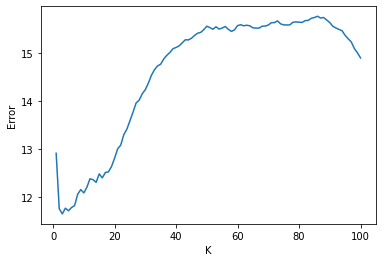

In [49]:
# Learning

best_K = KNNR_FIT(X_Train, High_Train, X_Valid, High_Valid, 1, 100)

In [0]:
#Predict

Highhat_Test = KNNR_predict(X_Train, High_Train, X_Test, best_K)
error_Test = find_error_MAE_onces(High_Test, Highhat_Test)

In [52]:
error_Test

8.248911111111092

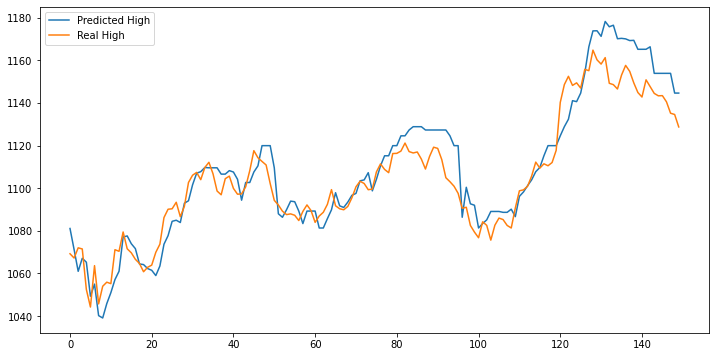

In [53]:
fig = plt.figure(figsize = (12, 6))
plt.plot(Highhat_Test, label = 'Predicted High')
plt.plot(High_Test, label = 'Real High')
plt.legend()

Example II : EURUSD Data

In [152]:
# Prepare data

uploaded = files.upload()

Saving EURUSD_D1_Dataset_Regression.xlsx to EURUSD_D1_Dataset_Regression (2).xlsx


In [0]:
data = pd.read_excel((uploaded['EURUSD_D1_Dataset_Regression.xlsx']),usecols = 'N:AD', skiprows = range(5))

In [262]:
data

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,1.13009,1.14506,1.14438,1.15077,1.15366,1.12014,1.12723,1.13265,1.13006,1.14346,1.144792,1.130708,1.157813,1.124715,1.14888,1.16229,1.14888
1,1.14506,1.14438,1.15077,1.15366,1.16229,1.12723,1.13265,1.13006,1.14346,1.14888,1.139891,1.127185,1.158828,1.134312,1.15357,1.15739,1.14620
2,1.14438,1.15077,1.15366,1.16229,1.15739,1.13265,1.13006,1.14346,1.14888,1.14620,1.141614,1.127200,1.160360,1.135908,1.15120,1.15370,1.14667
3,1.15077,1.15366,1.16229,1.15739,1.15370,1.13006,1.14346,1.14888,1.14620,1.14667,1.142536,1.129017,1.154614,1.146826,1.14913,1.14967,1.13744
4,1.15366,1.16229,1.15739,1.15370,1.14967,1.14346,1.14888,1.14620,1.14667,1.13744,1.145281,1.129365,1.159082,1.137762,1.13775,1.15766,1.13675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,1.12820,1.12253,1.12096,1.11558,1.11877,1.12033,1.12062,1.11457,1.11269,1.11013,1.126627,1.121320,1.124096,1.110560,1.11460,1.11509,1.11120
4228,1.12253,1.12096,1.11558,1.11877,1.11509,1.12062,1.11457,1.11269,1.11013,1.11120,1.127151,1.120990,1.121229,1.109647,1.11246,1.11509,1.11128
4229,1.12096,1.11558,1.11877,1.11509,1.11509,1.11457,1.11269,1.11013,1.11120,1.11128,1.125611,1.120867,1.115966,1.112306,1.11443,1.11610,1.11321
4230,1.11558,1.11877,1.11509,1.11509,1.11610,1.11269,1.11013,1.11120,1.11128,1.11321,1.124061,1.118768,1.116157,1.112227,1.11548,1.11620,1.10600


In [0]:
DataMatrix = data.values

In [264]:
DataMatrix.shape

(4232, 17)

In [0]:
number_of_target = 2
D = DataMatrix.shape[1] - number_of_target

In [0]:
X = DataMatrix[:, :D]
High = DataMatrix[:, D:D+1] # Predict High Value
# Low = DataMatrix[:, D+1:]

In [0]:
X_Train = X[:-300, :]
High_Train = High[:-300, :]
# Low_Train = Low[start_train:end_train, :]

X_Valid = X[-300:-150, :]
High_Valid = High[-300:-150, :]
# Low_Valid = Low[end_train:end_valid, :]

X_Test = X[-150:, :]
High_Test = High[-150:, :]
# Low_Test = Low[end_valid:, :]


4

K :  4 , error :  0.003939749999999882
K :  11 , error :  0.003965248484848088
K :  10 , error :  0.00397993333333288
K :  13 , error :  0.003983420512820097
K :  12 , error :  0.003987449999999551
K :  3 , error :  0.004022244444444733
K :  14 , error :  0.0040274761904756425
K :  5 , error :  0.00403444000000011
K :  9 , error :  0.004060481481480993
K :  15 , error :  0.004099586666666274
K :  7 , error :  0.004127304761904457
K :  8 , error :  0.00413940833333297
K :  16 , error :  0.00414794583333283
K :  17 , error :  0.0041780784313719555
K :  6 , error :  0.004240477777777455
K :  18 , error :  0.004247133333332719
K :  19 , error :  0.004265799999999544
K :  20 , error :  0.004286933333332703
K :  21 , error :  0.0043315682539676135
K :  22 , error :  0.004371466666666121
K :  23 , error :  0.00438663768115887
K :  24 , error :  0.004434661111110554
K :  27 , error :  0.004442148148147587
K :  26 , error :  0.004456071794871231
K :  28 , error :  0.004482557142856615
K :  2

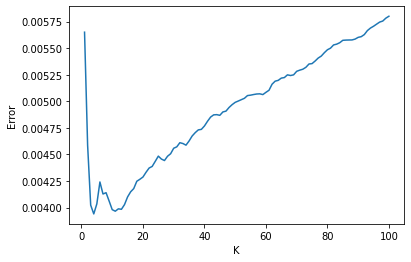

In [268]:
#Learning

best_K = KNNR_FIT(X_Train, High_Train, X_Valid, High_Valid, 1, 100)

In [0]:
#Predict

Highhat_Test = KNNR_predict(X_Train, High_Train, X_Test, best_K)
error_Test = find_error_MAE_onces(High_Test, Highhat_Test)


In [272]:
error_Test

0.0035636333333333202

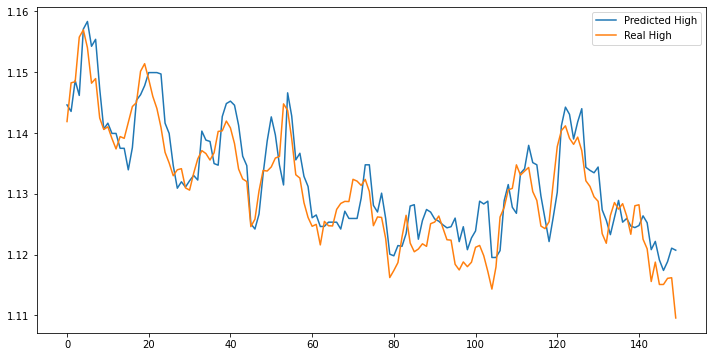

In [273]:
fig = plt.figure(figsize = (12, 6))
plt.plot(Highhat_Test, label = 'Predicted High')
plt.plot(High_Test, label = 'Real High')
plt.legend()

Text(0, 0.5, 'Y')

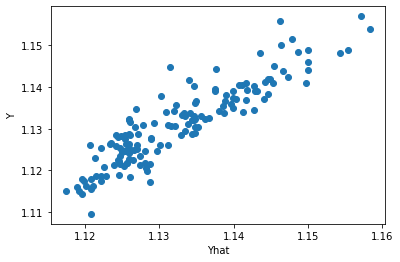

In [274]:
plt.scatter(Highhat_Test, High_Test)
plt.xlabel('Yhat')
plt.ylabel('Y')

Example III : BMI Data

In [54]:
# Prepare data

uploaded = files.upload()

Saving BMI_Dataset_Regression.xlsx to BMI_Dataset_Regression.xlsx


In [0]:
data = pd.read_excel((uploaded['BMI_Dataset_Regression.xlsx']))

In [61]:
data

,Weight,Height,Target
0,66.17,185.21,19.289713
1,71.27,168.91,24.980524
2,73.17,179.83,22.625011
3,81.74,171.76,27.707434
4,92.97,172.89,31.102301
...,...,...,...
995,63.24,141.45,31.604193
996,47.55,166.64,17.122030
997,68.10,168.52,23.977842
998,74.39,169.24,25.974427


In [0]:
DataMatrix = data.values

In [63]:
DataMatrix.shape

(1000, 3)

In [0]:
D = DataMatrix.shape[1] - 1

In [0]:
X = DataMatrix[:, :D]
X = np.array(X, dtype=np.float32)
Y = DataMatrix[:, D:]

In [0]:
start_train = 0
end_train = -300
end_valid = -150

X_Train = X[start_train:end_train, :]
Y_Train = Y[start_train:end_train, :]

X_Valid = X[end_train:end_valid, :]
Y_Valid = Y[end_train:end_valid, :]

X_Test = X[end_valid:, :]
Y_Test = Y[end_valid:, :]

5

K :  5 , error :  0.2793283445042106
K :  6 , error :  0.2796154639730383
K :  4 , error :  0.2870354959898069
K :  1 , error :  0.2906886155919456
K :  3 , error :  0.2913682342595428
K :  7 , error :  0.29161310829704473
K :  2 , error :  0.2940527745937604
K :  9 , error :  0.30425812935574215
K :  8 , error :  0.3079550031723539
K :  10 , error :  0.31557031995090734
K :  11 , error :  0.32320543335057766
K :  12 , error :  0.3240056570867888
K :  13 , error :  0.3368884481481036
K :  15 , error :  0.33908608333515433
K :  14 , error :  0.34184022406079023
K :  16 , error :  0.3500233739083683
K :  17 , error :  0.35709536449210777
K :  18 , error :  0.3601462914330693
K :  19 , error :  0.3681592932835073
K :  20 , error :  0.3825591047692025
K :  21 , error :  0.3974650356570922
K :  22 , error :  0.41310246477594215
K :  23 , error :  0.42358596164244244
K :  24 , error :  0.43450558619337204
K :  25 , error :  0.4425250108170792
K :  26 , error :  0.44959879049844764
K :  27

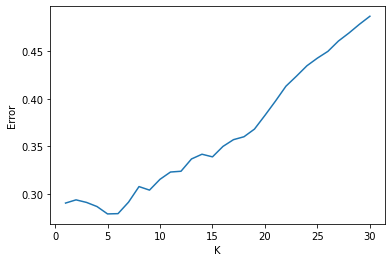

In [69]:
best_K = KNNR_FIT(X_Train, Y_Train, X_Valid, Y_Valid, 1, 30)

In [0]:
Yhat_Test = KNNR_predict(X_Train, Y_Train, X_Test, best_K)
error_Test = find_error_MAE_onces(Y_Test, Yhat_Test)

In [71]:
error_Test

0.20098001046378253

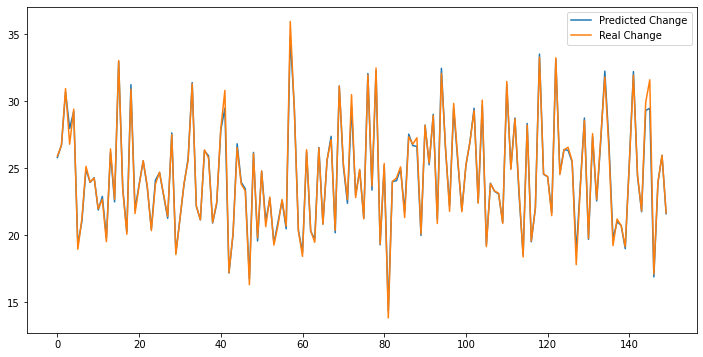

In [72]:
fig = plt.figure(figsize = (12, 6))
plt.plot(Yhat_Test, label = 'Predicted Change')
plt.plot(Y_Test, label = 'Real Change')
plt.legend()

Text(0, 0.5, 'Y')

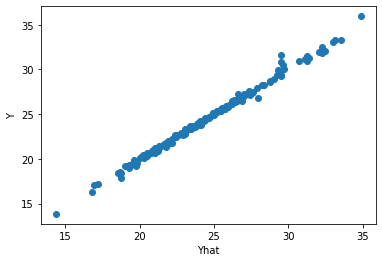

In [73]:
plt.scatter(Yhat_Test, Y_Test)
plt.xlabel('Yhat')
plt.ylabel('Y')